Analyze the risk of a stock, based on its previous performance history.
Predicting future stock prices through a Long Short Term Memory (LSTM) method!   

In [1]:
# !pip install -q hvplot
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader
# !pip install -q yfinance

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [15]:
# Set up End and Start times for data grab
stock = 'GOOG'

end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

# globals() is a sloppy way of setting the DataFrame names, but its simple
globals()[stock] = yf.download(stock, start, end)
    

[*********************100%***********************]  1 of 1 completed


In [16]:
df = pd.DataFrame(data=GOOG)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-21,2736.949951,2751.649902,2692.229980,2729.570068,2729.570068,1331600
2022-03-22,2730.000000,2830.000000,2730.000000,2805.550049,2805.550049,1488800
2022-03-23,2782.770020,2800.500000,2763.330078,2770.070068,2770.070068,1265100
2022-03-24,2785.449951,2827.929932,2760.788086,2826.239990,2826.239990,1027200
2022-03-25,2835.080078,2839.189941,2793.989990,2830.429932,2830.429932,963500
2022-03-28,2813.689941,2839.530029,2796.562988,2839.000000,2839.000000,1188700
2022-03-29,2863.209961,2883.250000,2849.679932,2865.000000,2865.000000,1433900
2022-03-30,2857.399902,2869.610107,2843.360107,2852.889893,2852.889893,1052300
2022-03-31,2848.969971,2852.889893,2792.379883,2792.989990,2792.989990,1475800


In [17]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,1048.603365,1058.530655,1038.761178,1048.955341,1048.955341,2.262459e+06
std,675.010001,681.982490,668.132283,675.160728,675.160728,1.746765e+06
min,279.123779,281.205963,277.220917,278.481171,278.481171,7.922000e+03
25%,549.022675,553.443008,542.602798,548.788315,548.788315,1.267150e+06
50%,835.755005,841.975006,831.254974,836.994995,836.994995,1.661300e+06
75%,1229.455017,1241.614990,1219.782501,1230.845032,1230.845032,2.665000e+06
max,3037.270020,3042.000000,2997.750000,3014.179932,3014.179932,2.497807e+07


In [18]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2012-04-02 to 2022-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2518 non-null   float64
 1   High       2518 non-null   float64
 2   Low        2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Adj Close  2518 non-null   float64
 5   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.7 KB


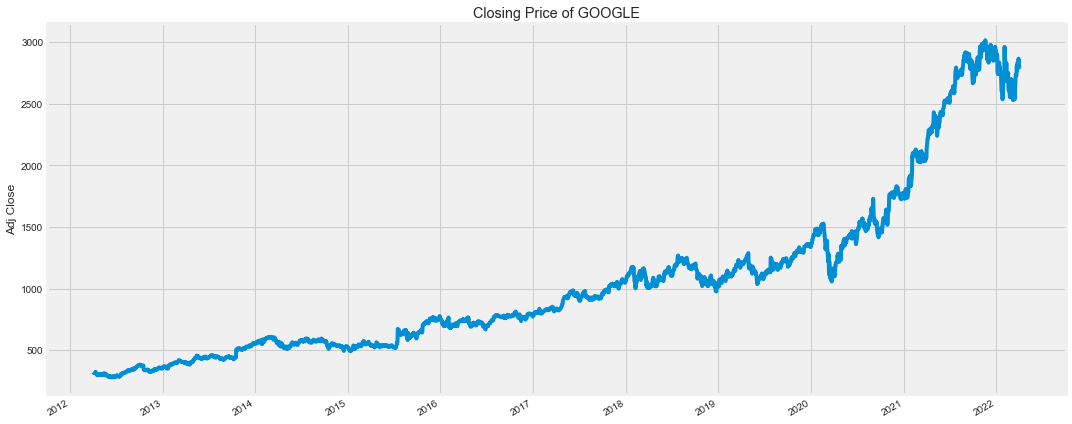

In [20]:
plt.figure(figsize=(15, 6))
GOOG['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of GOOGLE")
    
plt.tight_layout()

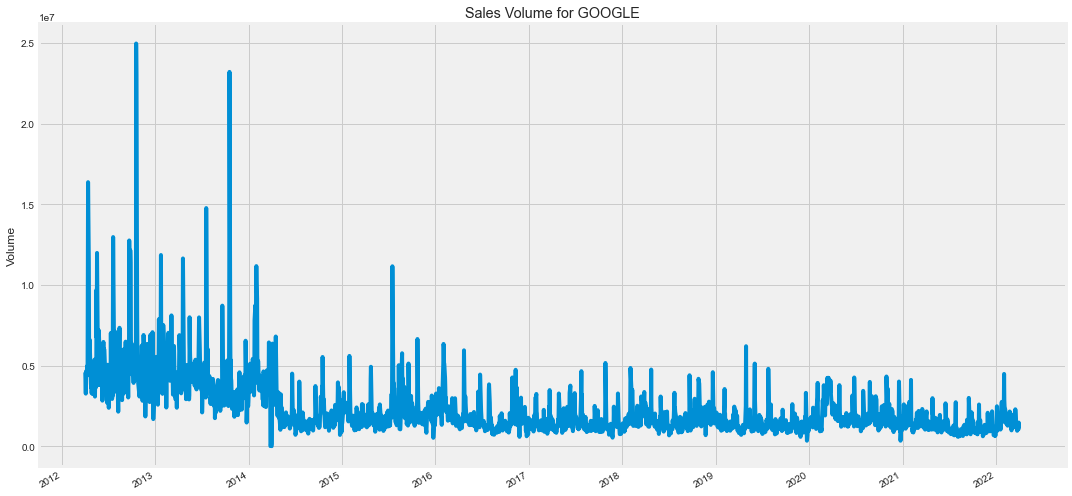

In [21]:
# total volume of stock being traded each day
plt.figure(figsize=(15, 7))
GOOG['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for GOOGLE")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# Moving average of the various stocks.

In [22]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    GOOG[column_name] = GOOG['Adj Close'].rolling(ma).mean()

In [27]:
print(GOOG.columns)
print(GOOG['MA for 10 days'].tail(10))
print("\n\n")
print(GOOG['MA for 20 days'].tail(20))
print("\n\n")
print(GOOG['MA for 50 days'].tail(50))

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA for 10 days',
       'MA for 20 days', 'MA for 50 days'],
      dtype='object')
Date
2022-03-21    2644.549023
2022-03-22    2670.547021
2022-03-23    2679.822021
2022-03-24    2697.082031
2022-03-25    2719.174023
2022-03-28    2749.592017
2022-03-29    2776.771021
2022-03-30    2794.679004
2022-03-31    2804.777002
2022-04-01    2812.573999
Name: MA for 10 days, dtype: float64



Date
2022-03-07    2685.211011
2022-03-08    2673.551514
2022-03-09    2668.204517
2022-03-10    2659.433508
2022-03-11    2651.306506
2022-03-14    2643.917505
2022-03-15    2638.278003
2022-03-16    2635.543005
2022-03-17    2632.656006
2022-03-18    2637.149011
2022-03-21    2643.160010
2022-03-22    2654.035010
2022-03-23    2664.953516
2022-03-24    2673.592017
2022-03-25    2680.594019
2022-03-28    2687.653015
2022-03-29    2696.735010
2022-03-30    2704.628003
2022-03-31    2709.969507
2022-04-01    2718.547510
Name: MA for 20 days, dt

Now let's go ahead and plot all the additional Moving Averages

<AxesSubplot:xlabel='Date'>

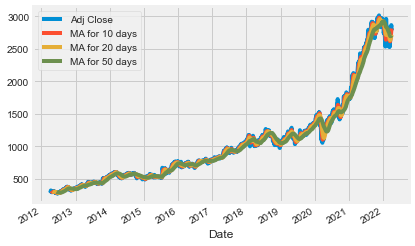

In [37]:
GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()

# Daily return of the stock on average

Check daily changes of the stock, and not just its absolute value.

<AxesSubplot:xlabel='Date'>

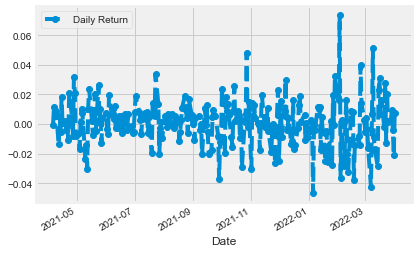

In [41]:
# We'll use pct_change to find the percent change for each day

GOOG['Daily Return'] = company['Adj Close'].pct_change()

GOOG['Daily Return'].plot(legend=True, linestyle='--', marker='o')

Text(0.5, 1.0, 'GOOGLE')

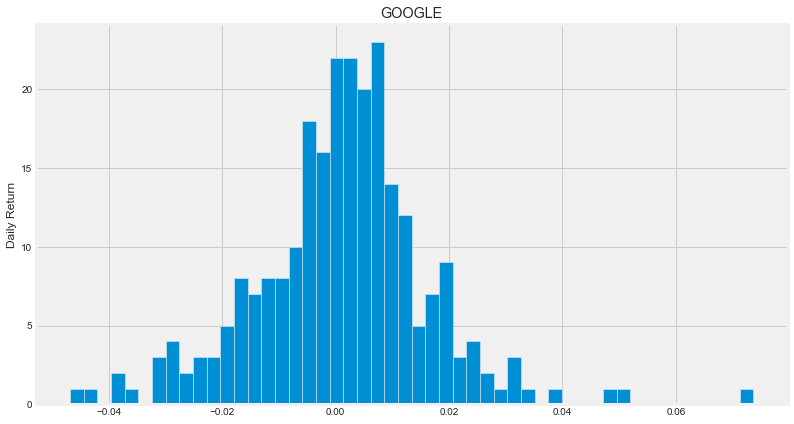

In [43]:
plt.figure(figsize=(12, 7))

GOOG['Daily Return'].hist(bins=50)
plt.ylabel('Daily Return')
plt.title(f'GOOGLE')

In [44]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = DataReader('GOOG', 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Date
2012-04-02    322.252106
2012-04-03    320.110138
2012-04-04    316.389099
2012-04-05    314.979370
2012-04-09    314.242157
Name: Adj Close, dtype: float64

In [45]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Date
2012-04-02         NaN
2012-04-03   -0.006647
2012-04-04   -0.011624
2012-04-05   -0.004456
2012-04-09   -0.002341
Name: Adj Close, dtype: float64

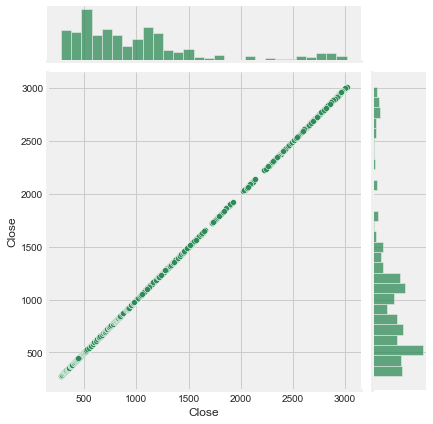

In [48]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x=GOOG['Close'], y=GOOG['Close'], data=tech_rets, kind='scatter', color='seagreen')

# How much value do we put at risk by investing in a particular stock?

Quantify risk using the info of daily percentage returns and comparing the expected return with the standard deviation of the daily returns.

Text(0, 0.5, 'Risk')

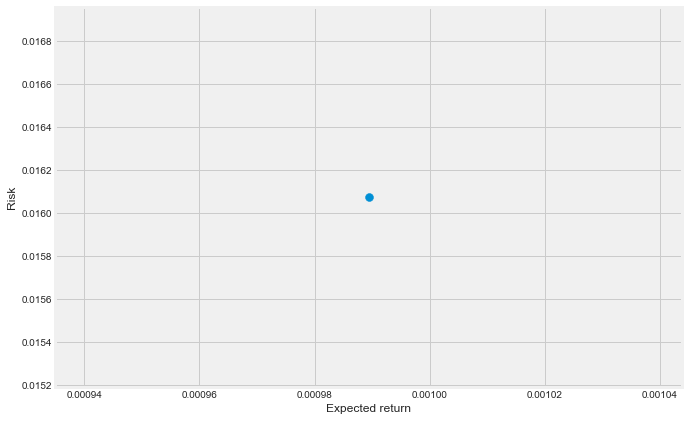

In [56]:
rets = tech_rets.dropna()
# drop NaN values

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

# Predicting the closing price stock price of GOOGLE:

In [57]:
df = DataReader('GOOG', data_source='yahoo', start='2012-01-01', end=datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,332.827484,324.966949,325.250885,331.462585,7380561.0,331.462585
2012-01-04,333.873566,329.076538,331.273315,332.892242,5749470.0,332.892242
2012-01-05,330.745270,326.889740,329.828735,328.274536,6590410.0,328.274536
2012-01-06,328.767700,323.681763,328.344299,323.796326,5405987.0,323.796326
2012-01-09,322.291962,309.455078,322.042908,310.067780,11688849.0,310.067780
...,...,...,...,...,...,...
2022-03-29,2883.250000,2849.679932,2863.209961,2865.000000,1433900.0,2865.000000
2022-03-30,2869.610107,2843.360107,2857.399902,2852.889893,1052300.0,2852.889893
2022-03-31,2852.889893,2792.379883,2848.969971,2792.989990,1475800.0,2792.989990


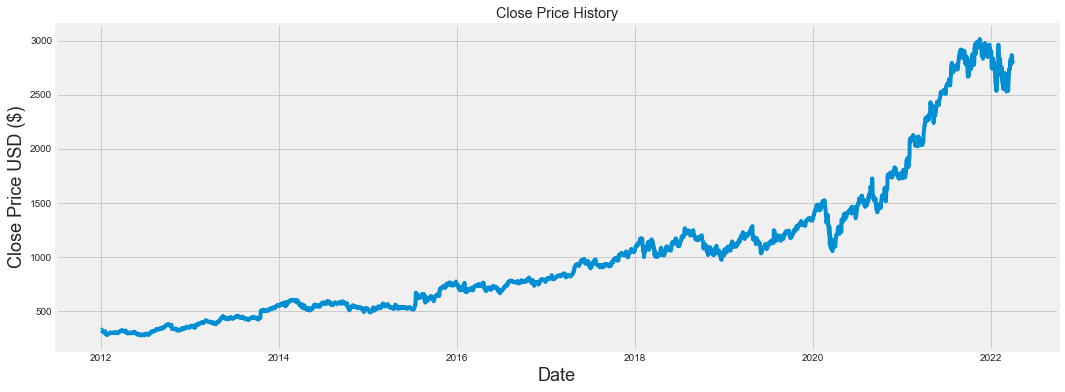

In [58]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [59]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2452

In [60]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01936668],
       [0.01988928],
       [0.01820133],
       ...,
       [0.91914682],
       [0.92682676],
       [0.92682676]])

In [61]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01936668, 0.01988928, 0.01820133, 0.01656438, 0.01154608,
       0.01166991, 0.01218339, 0.01285346, 0.01200677, 0.01266046,
       0.01344889, 0.01466159, 0.0049054 , 0.00481982, 0.00398405,
       0.00190099, 0.00164789, 0.00381107, 0.00339409, 0.00383474,
       0.00396584, 0.00474517, 0.00678818, 0.00911159, 0.00868915,
       0.00924999, 0.00954314, 0.00853257, 0.00967788, 0.0092336 ,
       0.00846884, 0.00864364, 0.00830132, 0.01000564, 0.0089022 ,
       0.00856898, 0.00925909, 0.00915165, 0.01080499, 0.0107795 ,
       0.01153516, 0.01132577, 0.01005116, 0.00835958, 0.00869462,
       0.00875653, 0.00750196, 0.00839417, 0.01069393, 0.01036799,
       0.01130391, 0.01201587, 0.01364372, 0.0135545 , 0.01473624,
       0.0158415 , 0.01521149, 0.01643874, 0.01601813, 0.01760956])]
[0.016271218787306516]

[array([0.01936668, 0.01988928, 0.01820133, 0.01656438, 0.01154608,
       0.01166991, 0.01218339, 0.01285346, 0.01200677, 0.01266046,
       0.01344889, 0.01466159, 0.0

In [62]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2392/2392 [==============================] - 70s 28ms/step - loss: 9.0798e-04


In [63]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

74.2044238968303

C:\Users\hp\AppData\Local\Temp/ipykernel_12292/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


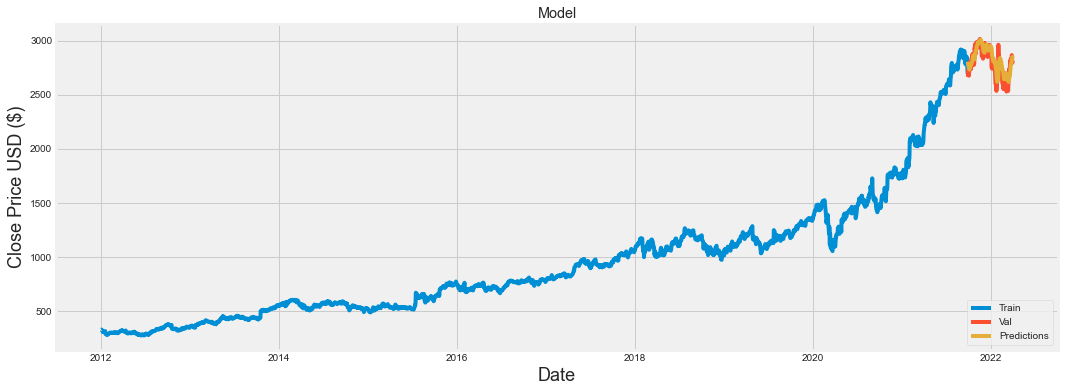

In [64]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [65]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-09-30,2665.310059,2803.647705
2021-10-01,2729.250000,2771.483398
2021-10-04,2675.300049,2754.789307
2021-10-05,2723.540039,2737.506836
2021-10-06,2747.080078,2732.077637
...,...,...
2022-03-29,2865.000000,2817.289062
2022-03-30,2852.889893,2835.600586
2022-03-31,2792.989990,2848.368896
